<a href="https://colab.research.google.com/github/timleunghk/buildroot-webkit/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

train_df=pd.read_csv('titanic/train.csv')
test_df=pd.read_csv('titanic/test.csv')

submit_df=pd.read_csv('titanic/gender_submission.csv')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [128]:
train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
train_df.shape

(891, 12)

In [131]:
test_df.shape

(418, 11)

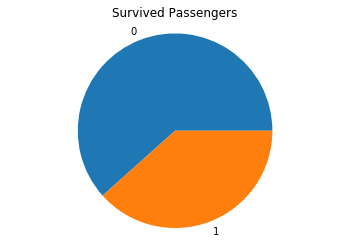

In [132]:
y_label=train_df.Survived.value_counts(ascending=False,normalize=True).index
y_value=train_df.Survived.value_counts(ascending=False,normalize=True).values

plt.title('Survived Passengers')
plt.pie(y_value,labels=y_label)
plt.axis('equal')
plt.draw()

In [133]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Farthing, Mr. John",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [134]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
null_columns=train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum(axis=0)

Age         177
Cabin       687
Embarked      2
dtype: int64

In [137]:
null_columns=test_df.columns[test_df.isnull().any()]
test_df[null_columns].isnull().sum(axis=0)

Age       86
Fare       1
Cabin    327
dtype: int64

In [0]:
df_set=[train_df,test_df]

In [0]:
for df in df_set:
  df['Name_length'] = df['Name'].apply(len)

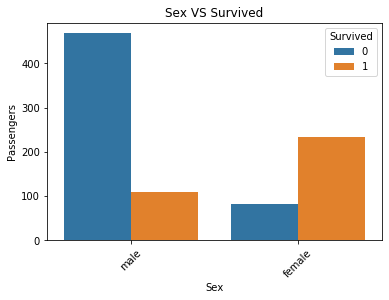

In [140]:
sns.countplot(x='Sex', data=train_df, hue='Survived')
plt.xticks(rotation=45)
plt.title('Sex VS Survived')
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.show()

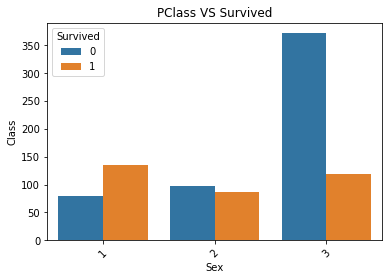

In [141]:
sns.countplot(x='Pclass', data=train_df, hue='Survived')
plt.xticks(rotation=45)
plt.title('PClass VS Survived')
plt.xlabel('Sex')
plt.ylabel('Class')
plt.show()

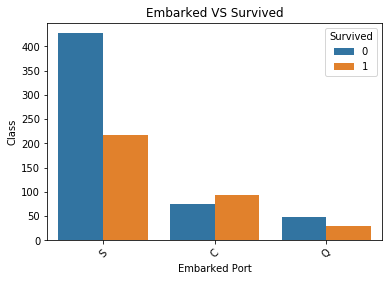

In [142]:
sns.countplot(x='Embarked', data=train_df, hue='Survived')
plt.xticks(rotation=45)
plt.title('Embarked VS Survived')
plt.xlabel('Embarked Port')
plt.ylabel('Class')
plt.show()

In [143]:
train_df['Cabin'].unique()
train_df['Cabin'].str.get(0).unique()


array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [144]:
test_df['Cabin'].str.get(0).unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [0]:
for df in df_set:
  df['Deck'] = df['Cabin'].str.get(0) #Get the 1st letter of cabin name 
  df['Deck'] = df['Deck'].fillna('M')
  df['Deck'] = df['Deck'].map({'A':0,
                               'B':1,
                               'C':2,
                               'D':3,
                               'E':4,
                               'F':5,
                               'G':6,
                               'M':7,
                               'T':8}).astype('int')

In [0]:
#Handle Saluation
for df in df_set:
    df['Saluation'] = df['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
    importan_person = ['Dr' , 'Rev' , 'Col' , 'Major' , 'Mlle' , 'Don' , 'Sir' , 'Ms' , 'Capt' , 'Lady' , 'Mme' , 'the Countess' , 'Jonkheer' , 'Dona'] 
    for person in importan_person:
        df['Saluation'].replace(person, 'IMP' , inplace=True)

    df['Saluation'] = df['Saluation'].replace('Mlle', 'Miss')
    df['Saluation'] = df['Saluation'].replace('Ms', 'Miss')
    df['Saluation'] = df['Saluation'].replace('Mme', 'Mrs')
    df['Saluation'] = df['Saluation'].map({'Mr' : 0,
                                           'Mrs' : 1,
                                           'Miss':2,
                                           'Master':3,
                                           'IMP':4
                                           }).astype('int')


In [147]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Deck,Saluation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,7,0


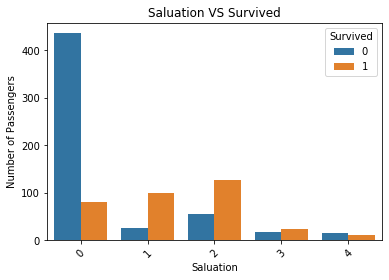

In [148]:
sns.countplot(x='Saluation', data=train_df, hue='Survived')
plt.xticks(rotation=45)
plt.title('Saluation VS Survived')
plt.xlabel('Saluation')
plt.ylabel('Number of Passengers')
plt.show()

In [0]:
#Fill na value properly in order to not affecting result

for df in df_set:
  df.Embarked.fillna('S',inplace=True)
  df.Fare.fillna(df.Fare.median(),inplace=True)
  df['FamilyMembers']= df['SibSp'] + df['Parch'] + 1
  df['IsAlone'] = 0
  df.loc[df['FamilyMembers'] == 1, 'IsAlone'] = 1


In [0]:
for df in df_set:
  age_avg = df['Age'].mean()
  age_std = df['Age'].std()
  age_null_count = df['Age'].isnull().sum()
  age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
  df['Age'][np.isnan(df['Age'])] = age_null_random_list
  df['Age'] = df['Age'].astype(int)

In [151]:
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

train_df['CategoricalAge']


0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: CategoricalAge, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]

In [152]:
train_df['CategoricalFare']= pd.cut(train_df['Fare'], 4)

train_df['CategoricalFare']

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
886    (-0.512, 128.082]
887    (-0.512, 128.082]
888    (-0.512, 128.082]
889    (-0.512, 128.082]
890    (-0.512, 128.082]
Name: CategoricalFare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] <
                                    (384.247, 512.329]]

In [0]:
for df in df_set:
  df.loc[ df['Fare'] <= 128.082, 'Fare'] = 0
  df.loc[(df['Fare'] > 128.082) & (df['Fare'] <= 256.165), 'Fare']= 1
  df.loc[(df['Fare'] > 256.165) & (df['Fare'] <= 384.247), 'Fare']= 2
  df.loc[ df['Fare'] > 384.247, 'Fare']=3

  df['Fare'] = df['Fare'].astype(int)

In [0]:
#Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
#                                    (64.0, 80.0]]

for df in df_set:
  df.loc[ df['Age'] <= 16.0, 'Age'] = 0
  df.loc[(df['Age'] > 16.0) & (df['Age'] <= 32.0), 'Age']= 1
  df.loc[(df['Age'] > 32.0) & (df['Age'] <= 48.0), 'Age']= 2
  df.loc[(df['Age'] > 48.0) & (df['Age'] <= 64.0), 'Age']= 3
  df.loc[ df['Age'] > 64.0, 'Age']=4

  df['Age'] = df['Age'].astype(int)

In [0]:
for df in df_set:
  df = df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

In [156]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Deck,Saluation,FamilyMembers,IsAlone,CategoricalAge,CategoricalFare
0,1,0,3,male,1,1,0,0,S,23,7,0,2,0,"(16.0, 32.0]","(-0.512, 128.082]"
1,2,1,1,female,2,1,0,0,C,51,2,1,2,0,"(32.0, 48.0]","(-0.512, 128.082]"
2,3,1,3,female,1,0,0,0,S,22,7,2,1,1,"(16.0, 32.0]","(-0.512, 128.082]"
3,4,1,1,female,2,1,0,0,S,44,2,1,2,0,"(32.0, 48.0]","(-0.512, 128.082]"
4,5,0,3,male,2,0,0,0,S,24,7,0,1,1,"(32.0, 48.0]","(-0.512, 128.082]"


In [0]:
train_df_Sex=pd.get_dummies(train_df.Sex)
train_df_Embarked=pd.get_dummies(train_df.Embarked)
train_df_temp=pd.concat([train_df,train_df_Embarked],axis=1)
train_df=pd.concat([train_df_temp,train_df_Sex],axis=1)

test_df_Sex=pd.get_dummies(test_df.Sex)
test_df_Embarked=pd.get_dummies(test_df.Embarked)
test_df_temp=pd.concat([test_df,test_df_Embarked],axis=1)
test_df=pd.concat([test_df_temp,test_df_Sex],axis=1)


In [0]:
df_set= [train_df,test_df]

for df in df_set:
  df = df.drop(['PassengerId','Embarked','Sex','SibSp','Parch'],axis=1,inplace=True)
 #df = df.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)


In [0]:
train_df = train_df.drop(['CategoricalAge','CategoricalFare'],axis=1)

In [160]:
train_df.head(5)

,Survived,Pclass,Age,Fare,Name_length,Deck,Saluation,FamilyMembers,IsAlone,C,Q,S,female,male
0,0,3,1,0,23,7,0,2,0,0,0,1,0,1
1,1,1,2,0,51,2,1,2,0,1,0,0,1,0
2,1,3,1,0,22,7,2,1,1,0,0,1,1,0
3,1,1,2,0,44,2,1,2,0,0,0,1,1,0
4,0,3,2,0,24,7,0,1,1,0,0,1,0,1


In [161]:
test_df.head(5)

,Pclass,Age,Fare,Name_length,Deck,Saluation,FamilyMembers,IsAlone,C,Q,S,female,male
0,3,2,0,16,7,0,1,1,0,1,0,0,1
1,3,2,0,32,7,1,2,0,0,0,1,1,0
2,2,3,0,25,7,0,1,1,0,1,0,0,1
3,3,1,0,16,7,0,1,1,0,0,1,0,1
4,3,1,0,44,7,1,3,0,0,0,1,1,0


In [162]:
X=np.array(train_df.drop('Survived',axis=1))
Y=np.array(train_df.Survived)
print('UnderSampling before sum:',np.sum(Y==1),np.sum(X==0))


UnderSampling before sum: 342 4524


In [163]:

from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

kf=KFold(n_splits=10,shuffle=True) #K-nn nearest neighbourhood 
scores=[]

for train_id,test_id in kf.split(X):  #X: from sampler
  x=X[train_id]
  y=Y[train_id]
  clf=RandomForestClassifier()
  clf.fit(x,y) #Make model here!
  pred_y=clf.predict(X[test_id]) #Model done, use this number, predict Y output from X[test_id]
  score=accuracy_score(Y[test_id],pred_y) #Compare Y[test_id] as answer with pred_y as predicted result to make a score
  scores.append(score) #Append into scores list


scores=np.array(scores)
print(scores.mean(),scores.std())

0.8147815230961297 0.03203716508081349


In [164]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(Y[test_id],pred_y))
print(precision_score(Y[test_id],pred_y))

0.6470588235294118
0.8148148148148148


In [165]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [166]:
#Find the best parameters for testing model by grid search

from sklearn.model_selection import GridSearchCV

params={
    'criterion':['entropy'],
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[10,20,30,40,50],
}

clf_gs=GridSearchCV(RandomForestClassifier(),params,cv=KFold(n_splits=10,shuffle=True),scoring='accuracy')
clf_gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                  

In [167]:
#Found best parameters from above block to train!
print("Score:",clf_gs.best_score_)
print("Parameters:",clf_gs.best_params_)

Score: 0.8170594837261503
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


In [168]:
#clf_best=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=20)
clf_best=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=10)
clf_best.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
submit_df=pd.read_csv('titanic/gender_submission.csv')

df_submission = pd.DataFrame()
df_submission['PassengerId'] = submit_df['PassengerId']
df_submission['Survived'] = clf_best.predict(np.array(test_df))

df_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [170]:
df_submission.to_csv('titanic/answer26.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
